In [ ]:
import torch
import torch.nn as nn # ALL neural network modules, nn.Linear, nn.Conv2d, Batch
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F # ALL functions that don't have any parameters
from torch.utils.data import DataLoader # Gives easier dataset managment and cri
import torchvision.datasets as datasets # Has standard datasets we can import
import torchvision.transforms as transforms # Transformations we can perform on
import matplotlib.pyplot as plt
import torchvision
class my_model(nn.Module):
    def __init__(self):
        super(my_model, self).__init__()
        self.fc2 = nn.Linear(128, 10)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(10816, 128)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
    
mod = my_model()

In [ ]:
input_size = 784 # 28x28 = 784, size of MNIST images (grayscale)
num_classes = 10
batch_size = 64
train_dataset = datasets.FashionMNIST( 
    root="dataset/",
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)
print(len(train_dataset) , 'length of the train dataset')

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.FashionMNIST(
    root="dataset/",
    train=False,
    transform=transforms.ToTensor(),
    download=True,
)
print(len(test_dataset) , 'length of the test dataset')

test_loader = DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=True
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to dataset/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/FashionMNIST/raw

60000 length of the train dataset
10000 length of the test dataset


tensor([9, 6, 7, 4, 2, 9, 8, 5, 0, 3, 0, 1, 2, 2, 3, 2, 5, 1, 7, 8, 8, 9, 4, 4,
        4, 4, 0, 9, 5, 8, 6, 4, 3, 2, 5, 2, 4, 3, 2, 6, 6, 9, 8, 3, 2, 2, 8, 3,
        5, 6, 4, 1, 3, 1, 5, 8, 0, 7, 4, 1, 7, 4, 2, 5])


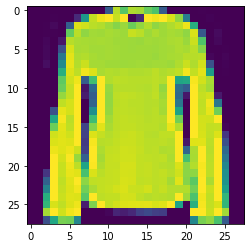

In [ ]:
from google.colab.patches import cv2_imshow
it = iter(train_loader)


images , labels = it.next()

plt.imshow(images[4][0])
print(labels)



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
learning_rate = 0.001
num_epochs = 3
model = my_model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
print(model(torch.randn(64,1,28,28)).shape)

torch.Size([64, 10])


In [ ]:
all_loss = []
for epoch in range(10):
    print(f"Epoch: {epoch}")
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)
        scores = model(data) 
        loss = criterion(scores, targets)
        all_loss.append(loss)
        optimizer.zero_grad()   
        print(batch_idx,loss.item())
        loss.backward()
        optimizer.step()

Epoch: 0
0 2.3102939128875732
1 2.339576482772827
2 2.15869140625
3 2.10776424407959
4 2.0036585330963135
5 1.8119285106658936
6 1.603210687637329
7 1.5214433670043945
8 1.389733076095581
9 1.2736543416976929
10 0.9686112999916077
11 0.9881905913352966
12 1.077514886856079
13 1.13358473777771
14 0.9938408136367798
15 0.9630768299102783
16 0.8246444463729858
17 1.063902735710144
18 0.9352908730506897
19 0.7697632908821106
20 0.8868569135665894
21 0.8272367715835571
22 0.8708585500717163
23 0.8079038858413696
24 1.0605642795562744
25 0.6845796704292297
26 0.7551383376121521
27 0.4621227979660034
28 0.7506422400474548
29 0.7327580451965332
30 1.012802243232727
31 0.7845865488052368
32 0.9007459878921509
33 0.548729419708252
34 0.7707583904266357
35 0.6738232970237732
36 0.7790234684944153
37 0.9135714173316956
38 0.6318408250808716
39 0.5352383852005005
40 0.7151370048522949
41 0.6810134649276733
42 0.6140191555023193
43 0.5454033017158508
44 0.5998467206954956
45 0.47001519799232483
46 0

In [ ]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
#             x = x.reshape(x.shape[0], -1)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(
            f"Got {num_correct} / {num_samples} with accuracy"
            f" {float(num_correct) / float(num_samples) * 100:.2f}"
        )

    model.train()

In [ ]:


check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Got 59876 / 60000 with accuracy 99.79
Got 9194 / 10000 with accuracy 91.94
